# The European Social Survey
The European Social Survey (ESS) is an academically-driven multi-country survey, which has been administered in over 30 countries to date. Its three aims are, firstly - to monitor and interpret changing public attitudes and values within Europe and to investigate how they interact with Europe's changing institutions, secondly - to advance and consolidate improved methods of cross-national survey measurement in Europe and beyond, and thirdly - to develop a series of European social indicators, including attitudinal indicators.

The following analysis involves data from countries that have been included in the integrated ESS files in two or more rounds, and all variables from questions that have been asked in more than one round (2012 and 2014).
___
+ **Kind of Data:**
Survey data
+ **Unit of Analysis:** Individuals
+ **Universe:** All persons aged 15 and over resident within private households, regardless of their nationality, citizenship, language or legal status, in the participating countries.

In [339]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [340]:
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [341]:
# fill nan values with a float rounded to zero decimal places
data.fillna(round(data.mean(),0), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8594 non-null float64
ppltrst    8594 non-null float64
pplfair    8594 non-null float64
pplhlp     8594 non-null float64
happy      8594 non-null float64
sclmeet    8594 non-null float64
sclact     8594 non-null float64
gndr       8594 non-null float64
agea       8594 non-null float64
partner    8594 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


In [342]:
## ONLY RUN  THIS CELL ONCE ##

data.rename(columns = {'cntry':'country', 'tvtot':'tv_time', 'ppltrst':'ppl_trust', 'pplhlp':'ppl_help', 
                       'pplfair':'ppl_fair', 'sclmeet':'meetup', 'sclact':'activities', 'agea':'age'}, inplace=True)
data.country.replace(to_replace=['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], 
                     value=['Switzerland','Czech Republic','Germany','Spain','Norway','Sweden'], inplace=True)

data.year.replace([6,7],['2012','2014'], inplace=True)
data.partner = pd.get_dummies(data.partner, drop_first=False)
data.gndr.replace([1.0,2.0],['male','female'], inplace=True)
data.gndr = pd.get_dummies(data.gndr, drop_first=True)
data.rename(columns = {'gndr':'is_male'}, inplace=True)
data.head()

,country,idno,year,tv_time,ppl_trust,ppl_fair,ppl_help,happy,meetup,activities,is_male,age,partner
0,Switzerland,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,0,60.0,1
1,Switzerland,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,0,59.0,1
2,Switzerland,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1,24.0,0
3,Switzerland,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,0,64.0,1
4,Switzerland,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,0,55.0,1


## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

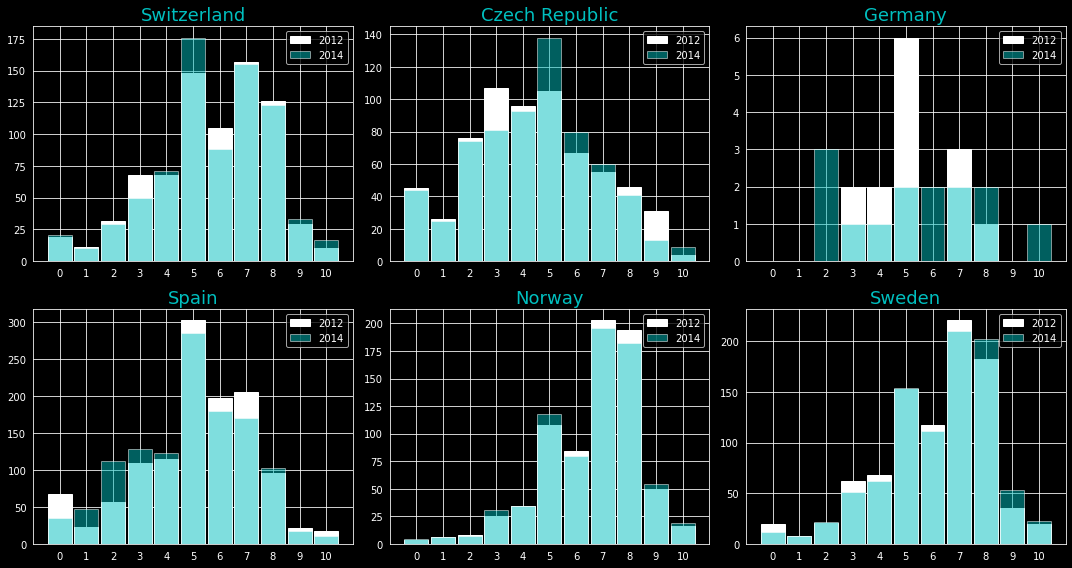

In [404]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(15,8))
    for idx, country in enumerate(data.country.unique()):
        plt.subplot(2,3,idx+1)
        plt.hist(data.ppl_trust[data.country==country][data.year=='2012'], bins=np.arange(12)-0.5, rwidth=.9, color='white')
        plt.hist(data.ppl_trust[data.country==country][data.year=='2014'], bins=np.arange(12)-0.5, rwidth=.9, color='c', alpha=0.5)
        plt.title(country, size=18, color='c')
        plt.xticks(np.arange(11))
        plt.legend(labels=['2012','2014'])
        
    plt.tight_layout()
    plt.show()

> It seems the distribution, in each year and for each country, with the possible exception of Germany, seems normally distributed for the most part. We'll test our perception with the Shapiro-Wilk test for normality. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [397]:
# Perform the Shapiro-Wilk test for normality.

for country in data.country.unique():
    for year in ['2012','2014']:
        print(f'{country}/{year}: pvalue = {stats.shapiro(data.ppl_trust[data.country==country][data.year==year])[1]}')
    print('-'*60)

Switzerland/2012: pvalue = 3.4958809444132896e-15
Switzerland/2014: pvalue = 7.692136586977955e-15
------------------------------------------------------------
Czech Republic/2012: pvalue = 1.0968960462154342e-10
Czech Republic/2014: pvalue = 6.91086965431964e-10
------------------------------------------------------------
Germany/2012: pvalue = 0.1178363636136055
Germany/2014: pvalue = 0.4519253373146057
------------------------------------------------------------
Spain/2012: pvalue = 5.989953442559737e-20
Spain/2014: pvalue = 3.623642153160767e-16
------------------------------------------------------------
Norway/2012: pvalue = 4.746945517161123e-19
Norway/2014: pvalue = 5.3375301406474455e-18
------------------------------------------------------------
Sweden/2012: pvalue = 2.3709762240942997e-19
Sweden/2014: pvalue = 1.0416553104982269e-18
------------------------------------------------------------


> We reject the null hypothesis of a normal distribution, except in Germany's case (with the smallest sample size of just 14 observations per year). Therefore, we'll use a non-parametric test. First, however, let's run a paired t-test for Germany to calculate the **two related** samples of scores.

In [401]:
print(f"Germany: pvalue = {stats.ttest_rel(data.ppl_trust[data.country=='Germany'][data.year=='2012'], data.happy[data.country=='Germany'][data.year=='2014'])[1]}")

Germany: pvalue = 0.0012273332478439885


> According to these results, there *is* a significant difference in Germany's willingness to trust others from 2012 to 2014.
### Non-Parametric comparisons (Kruskal-Wallace Test)

In [402]:
# Print the probability of getting this result if the groups were not different.
for country in data.country.unique():
    print(f"{country}: pvalue = {stats.kruskal(data.ppl_trust[data.year=='2012'][data.country==country], data.ppl_trust[data.year=='2014'][data.country==country])[1]}")

Switzerland: pvalue = 0.5828586111442048
Czech Republic: pvalue = 0.4871821543737458
Germany: pvalue = 0.8517300191250199
Spain: pvalue = 0.004465198799904911
Norway: pvalue = 0.6202917970862132
Sweden: pvalue = 0.038242393802365784


> At $α=0.5$, only Sweden and Spain show a significant difference in their williongness to trust people from 2012 to 2014. At $α=0.1$, none of them do. With the non-parametric test, Germany does NOT show a significant difference in willingness to trust people.

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

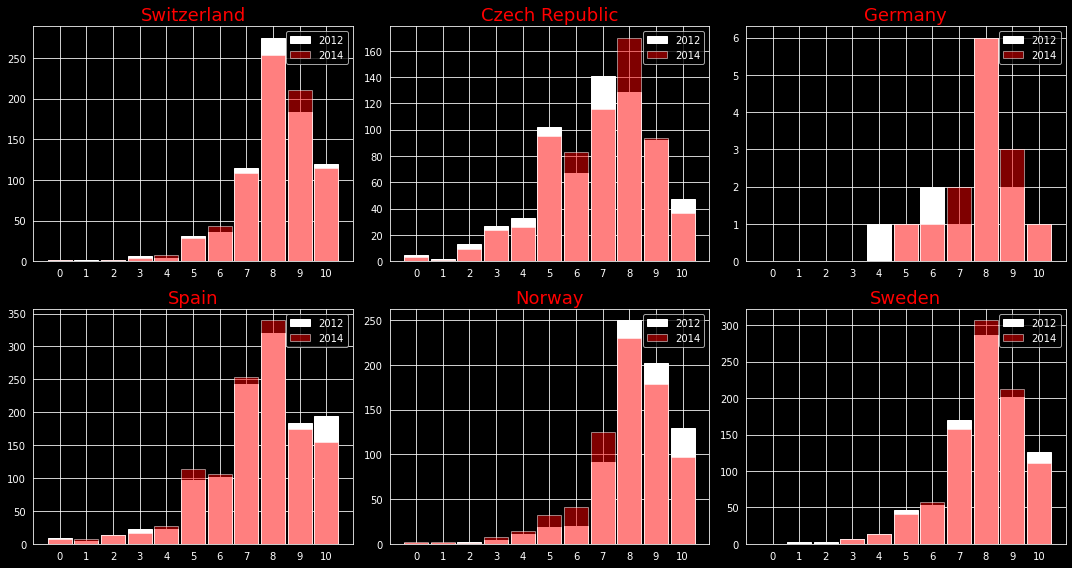

In [399]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(15,8))
    for idx, country in enumerate(data.country.unique()):
        plt.subplot(2,3,idx+1)
        plt.hist(data.happy[data.country==country][data.year=='2012'], bins=np.arange(12)-0.5, rwidth=.9, color='white')
        plt.hist(data.happy[data.country==country][data.year=='2014'], bins=np.arange(12)-0.5, rwidth=.9, color='r', alpha=0.5)
        plt.title(country, size=18, color='r')
        plt.xticks(np.arange(11))
        plt.legend(labels=['2012','2014'])
        
    plt.tight_layout()
    plt.show()

> It seems the distribution, in each year and for each country, with the possible exception of Germany, is negatively skewed. We'll confirm with the Shapiro-Wilk test for normality. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [383]:
# Perform the Shapiro-Wilk test for normality.

for country in data.country.unique():
    for year in ['2012','2014']:
        print(f'{country}/{year}: pvalue = {stats.shapiro(data.happy[data.country==country][data.year==year])[1]}')
    print('-'*60)

Switzerland/2012: pvalue = 4.3908151812478035e-24
Switzerland/2014: pvalue = 4.494222618578247e-23
------------------------------------------------------------
Czech Republic/2012: pvalue = 1.1562020905844881e-14
Czech Republic/2014: pvalue = 1.3153677340656885e-15
------------------------------------------------------------
Germany/2012: pvalue = 0.1986599564552307
Germany/2014: pvalue = 0.23006466031074524
------------------------------------------------------------
Spain/2012: pvalue = 4.054162651620818e-27
Spain/2014: pvalue = 3.676245276427884e-26
------------------------------------------------------------
Norway/2012: pvalue = 1.0794107025655545e-25
Norway/2014: pvalue = 3.1033939472688407e-23
------------------------------------------------------------
Sweden/2012: pvalue = 1.8555917534188833e-23
Sweden/2014: pvalue = 1.5563831860646677e-22
------------------------------------------------------------


> As expected, we reject the null hypothesis or a normal distribution except in Germany's case. Therefore, we'll use a non-parametric test. First, however, let's run a paired t-test for Germany to calculate the **two related** samples of scores.

In [384]:
print(f"Germany: pvalue = {stats.ttest_rel(data.happy[data.country=='Germany'][data.year=='2012'], data.happy[data.country=='Germany'][data.year=='2014'])[1]}")

Germany: pvalue = 0.4346138707734991


> According to these results, there is no significant difference in Germany's happiness from 2012 to 2014.
### Non-Parametric comparisons (Kruskal-Wallace Test)

In [390]:
# Print the probability of getting this result if the groups were not different.
for country in data.country.unique():
    print(f"{country}: pvalue = {stats.kruskal(data.happy[data.year=='2012'][data.country==country], data.happy[data.year=='2014'][data.country==country])[1]}")

Switzerland: pvalue = 0.6212723372583304
Czech Republic: pvalue = 0.27946501634100207
Germany: pvalue = 0.532001255058662
Spain: pvalue = 0.04315902004796964
Norway: pvalue = 1.3941031229053593e-05
Sweden: pvalue = 0.8245710499149336


> At $α=0.5$, only Norway and Spain show a significant difference in happiness from 2012 to 2014. At $α=0.1$, only Norway does. Notably, Germany shows a significant difference in neither the parametric nor non-parametric tests.

## 3. Who reported watching more TV in 2012, men or women?

In [408]:
data.tv_time[data.is_male==1][data.year=='2012'].mean()

3.9020427112349116

In [409]:
data.tv_time[data.is_male==0][data.year=='2012'].mean()

3.9444703686420906

> Women reported watching slightly more television than men in 2012.

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [410]:
data.ppl_fair[data.partner==1][data.year=='2012'].mean()

6.082431928384931

In [411]:
data.ppl_fair[data.partner==0][data.year=='2012'].mean()

5.857673267326732

> People with partners were more likely to belive people were fair in 2012.

## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [412]:
data.country.value_counts()

Spain             2426
Sweden            1816
Switzerland       1546
Norway            1462
Czech Republic    1316
Germany             28
Name: country, dtype: int64

In [414]:
data.groupby('country')['meetup'].mean()

country
Czech Republic    4.549392
Germany           4.714286
Norway            5.416553
Spain             5.244023
Sweden            5.476872
Switzerland       5.120310
Name: meetup, dtype: float64

+ ### We'll compare Sweden, Switzerland and Spain, as they have the highest number of observations.

In [416]:
stats.kruskal(data.meetup[data.year=='2014'][data.country=='Sweden'],
              data.meetup[data.year=='2014'][data.country=='Switzerland'],
              data.meetup[data.year=='2014'][data.country=='Spain'])

KruskalResult(statistic=21.064004219452187, pvalue=2.6669176177604354e-05)

> It appears that the groups differ significantly.  The test says there is a miniscule chance of getting our data if there were no systematic `meetup` differences between Sweden, Switzerland and Spain in the population. Based on our data, meetup frequency seems to differ systematically between the three countries.

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [424]:
data.age.describe()

count    8594.000000
mean       47.457645
std        18.139884
min        15.000000
25%        33.000000
50%        47.000000
75%        61.000000
max       114.000000
Name: age, dtype: float64

+ ### We'll use the quartile ranges as age similarity intervals, again comparing Sweden, Spain and Switzerland.

In [445]:
# Ages 15 to 33
stats.kruskal(data.activities[data.age < 33][data.year=='2014'][data.country=='Sweden'],
              data.activities[data.age < 33][data.year=='2014'][data.country=='Switzerland'],
              data.activities[data.age < 33][data.year=='2014'][data.country=='Spain'])

KruskalResult(statistic=5.811334798886218, pvalue=0.05471226347957819)

In [446]:
# Ages 33 to 47
stats.kruskal(data.activities[data.age > 33][data.age < 47][data.year=='2014'][data.country=='Sweden'],
              data.activities[data.age > 33][data.age < 47][data.year=='2014'][data.country=='Switzerland'],
              data.activities[data.age > 33][data.age < 47][data.year=='2014'][data.country=='Spain'])

KruskalResult(statistic=6.061267429700096, pvalue=0.04828502948829624)

In [447]:
# Ages 47 to 61
stats.kruskal(data.activities[data.age > 47][data.age < 61][data.year=='2014'][data.country=='Sweden'],
              data.activities[data.age > 47][data.age < 61][data.year=='2014'][data.country=='Switzerland'],
              data.activities[data.age > 47][data.age < 61][data.year=='2014'][data.country=='Spain'])

KruskalResult(statistic=2.101758607175314, pvalue=0.3496301828347873)

In [448]:
# Ages 61 and up
stats.kruskal(data.activities[data.age > 61][data.year=='2014'][data.country=='Sweden'],
              data.activities[data.age > 61][data.year=='2014'][data.country=='Switzerland'],
              data.activities[data.age > 61][data.year=='2014'][data.country=='Spain'])

KruskalResult(statistic=33.68056202120329, pvalue=4.8568968869219446e-08)

> At $α=0.5$, the most significant differences in activity level, between the three countries, occur over the age of 61 . In fact, at $α=0.1$ , that's the only age range with significant differences in activity level. At $α=0.5$, the age range between 33 and 44 years old also shows significant activity level differences between the three countries, .

# Superfluous Boxplot visualization vvvvvvvvvvvvv (practice)

country
Czech Republic    6.858663
Germany           7.642857
Norway            8.082763
Spain             7.484749
Sweden            7.927313
Switzerland       8.102199
Name: happy, dtype: float64


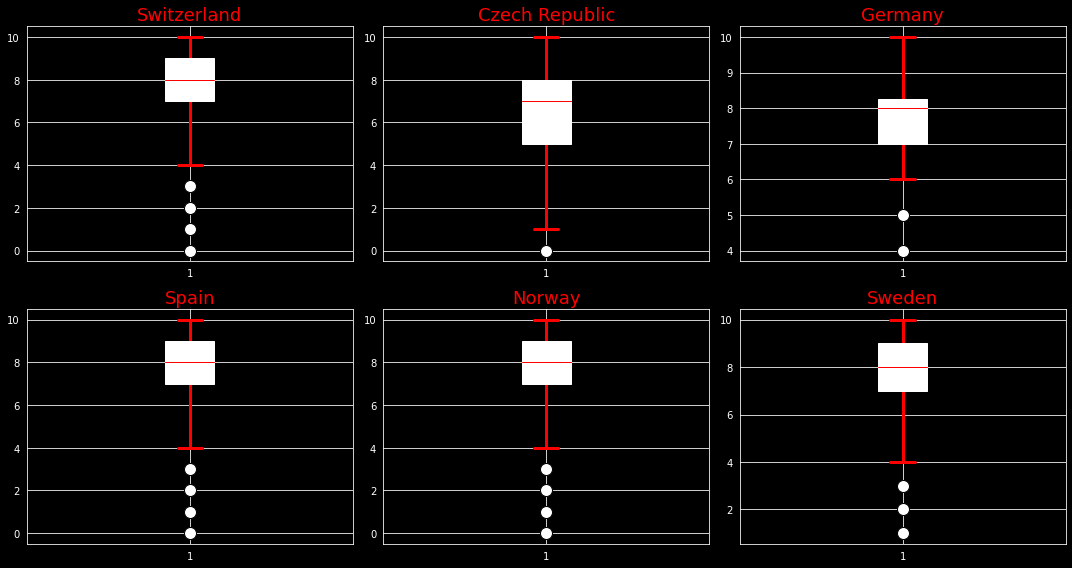

In [344]:
# Printing the means for each group.
print(data.groupby('country').happy.mean())

with plt.style.context('dark_background'):
    plt.figure(figsize=(15,8))
    for idx, country in enumerate(data.country.unique()):
        plt.subplot(2,3,idx+1)
        plt.boxplot(data.happy[data.country==country], patch_artist=True, 
                    boxprops=dict(facecolor='w', color='w'),
                    capprops=dict(color='r', linewidth=3),
                    whiskerprops=dict(color='r', linewidth=3),
                    flierprops=dict(markerfacecolor='w', markersize=12),
                    medianprops=dict(color='r'))
        plt.title(country, size=18, color='r')

    plt.tight_layout()
    plt.show()